/tmp/ipython-input-1338841196.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data (1).csv', encoding='latin1', on_bad_lines='skip')


--- Results for Roll 102303717 ---
Lambda: 0.0014590905290116402
Mu:     25.802708360471062
c:      0.021550938267777164


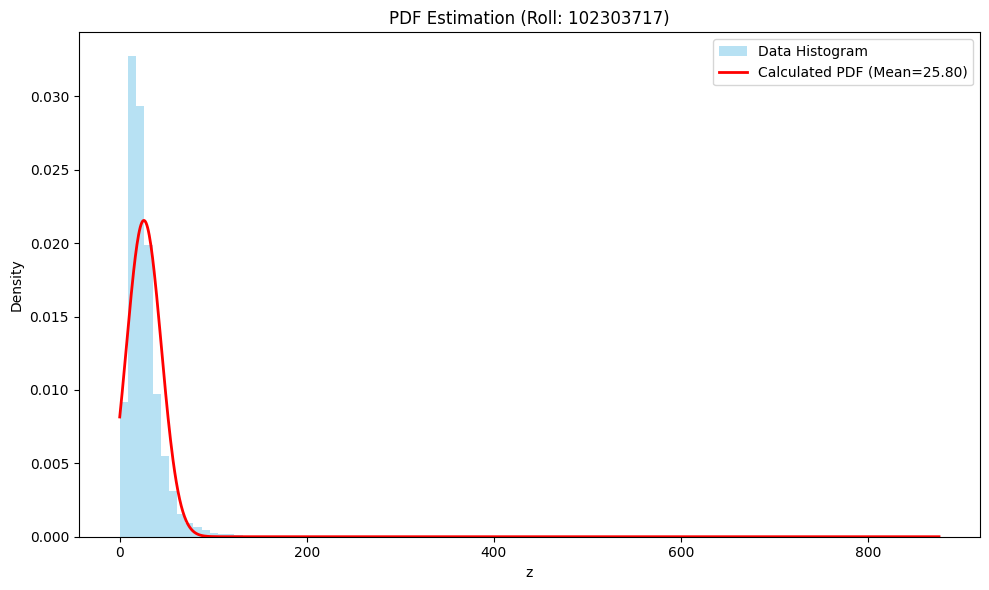

result graph


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

roll_number = 102303717

df = pd.read_csv('/content/data (1).csv', encoding='latin1', on_bad_lines='skip')
x = df['no2'].dropna().values

ar = 0.05 * (roll_number % 7)
br = 0.3 * ((roll_number % 5) + 1)
z = x + ar * np.sin(br * x)

mean_val = np.mean(z)
var_val = np.var(z)
lam_val = 1 / (2 * var_val)
c_val = np.sqrt(lam_val / np.pi)

print(f"--- Results for Roll {roll_number} ---")
print(f"Lambda: {lam_val}")
print(f"Mu:     {mean_val}")
print(f"c:      {c_val}")

plt.figure(figsize=(10, 6))
plt.hist(z, bins=100, density=True, color='skyblue', alpha=0.6, label='Data Histogram')

def pdf(z, c, lam, mu):
    return c * np.exp(-lam * (z - mu)**2)

z_line = np.linspace(z.min(), z.max(), 1000)
plt.plot(z_line, pdf(z_line, c_val, lam_val, mean_val), 'r-', linewidth=2, label=f'Calculated PDF (Mean={mean_val:.2f})')

plt.title(f'PDF Estimation (Roll: {roll_number})')
plt.xlabel('z')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('result_img.png')
plt.show()
print("result graph")